# Fig. 3 Timeseries of C pools predicted at the bare fallow sites

In [14]:
library(reshape2)
library(ggplot2)
library(ggpubr)

Warning message:
"package 'ggpubr' was built under R version 4.0.5"

Attaching package: 'ggpubr'


The following object is masked from 'package:plyr':

    mutate




## Panel a: Plot prediction timeseries of bare fallow

In [1]:
# load data
bf_mimics0 = read.csv(file = '../output/prediction_BF_MIMICSa.csv')
bf_mimics1 = read.csv(file = '../output/prediction_BF_MIMICSb.csv')
bf_mimics2 = read.csv(file = '../output/prediction_BF_MIMICSc.csv')

In [3]:
b_mi0 = subset(bf_mimics0, select=c('site', 'years', 'SOC_gC_per_kgSoil', 
                               'TSOC_pre_kg'))
b_mi0$Model = 'MIMICSa'

b_mi1 = subset(bf_mimics1, select=c('site', 'years', 'SOC_gC_per_kgSoil', 
                               'TSOC_pre_kg'))
b_mi1$Model = 'MIMICSb'

b_mi2 = subset(bf_mimics2, select=c('site', 'years', 'SOC_gC_per_kgSoil', 
                               'TSOC_pre_kg'))
b_mi2$Model = 'MIMICSc'

In [5]:
predata = rbind(b_mi0, b_mi1, b_mi2)
colnames(predata) = c('site', 'years', 'TSOC_ob',  'TSOC_pre',  'Model')
predata = predata[predata$years <= 100, ]

df = predata
df = subset(df, select = c(site, Model, years, TSOC_ob, TSOC_pre))
colnames(df) =  c('site', 'Model',  'years', 'x',  'y')

In [6]:
# index for model evaluation
lm_eqn1 <- function(df)
 {m <- lm(y ~ x, df);
  eq <- substitute(italic(y) == a + b %.% italic(x), 
                   list(a = round(unname(coef(m)[1]), digits = 3),
                        b = round(unname(coef(m)[2]), digits = 3),
                        r2 = round(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
  }

lm_eqn2 <- function(df)
 {m <- lm(y ~ x, df);
  eq <- substitute(~~italic(R)^2~"="~r2, 
                   list(a = round(unname(coef(m)[1]), digits = 3),
                        b = round(unname(coef(m)[2]), digits = 3),
                        r2 = round(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
  }

# rmse
rmse_eqn <- function(df)
  {   df = na.omit(df)
      rmse = (sum((df$x - df$y)^2)/dim(df)[1])^0.5;
      eq <- substitute(RMSE == rmse2, 
                       list(rmse2 = round(rmse, digits = 3)))       # RMSE
      as.character(as.expression(eq));
  } 

# r2 = 1-sse/sst
r2_eqn <- function(df)
 {sst <- sum((df$y - mean(df$y))^2);
  sse <- sum((df$x - df$y)^2);
  eq <- substitute(~~italic(R)^2~"="~r2, 
                   list(r2 = round(1 - (sse/sst), digits = 3)))
  as.character(as.expression(eq));
  }

In [7]:
library(plyr)
# calcualte index for model evaluation
eq1 <- ddply(na.omit(df),.(site, Model), rmse_eqn) 
eq2 <- ddply(na.omit(df),.(site, Model), r2_eqn)

# will be labelled at the top 
eq1.a = eq1
eq1.a[eq1.a$site == 'Rothamsted', ]$V1 = NA 
eq2.a = eq2
eq2.a[eq2.a$site == 'Rothamsted', ]$V1 = NA

# will be labelled at the bottom
eq1.b = eq1
eq1.b[eq1.b$site != 'Rothamsted', ]$V1 = NA 
eq2.b = eq2
eq2.b[eq2.b$site != 'Rothamsted', ]$V1 = NA 

Warning message:
"package 'plyr' was built under R version 4.0.5"


In [8]:
# predicted vs observed time-series plot
col_models = c('blue', 'red', 'green4')
bf_scatter = ggplot(aes(x = years , y = x), data = df)+ 
         facet_grid(site~ Model)+
         geom_point(size=2,shape=1, col = 'grey50') +
         geom_line(aes(x = years, y = y, col=factor(Model))) + 
         scale_color_manual(values= col_models) +
         # add model evaluation equations and labs
         geom_text(data=eq1.a, size = 4 ,
                   aes(x = 45, y = 29.6,label=V1), 
                   parse = TRUE, inherit.aes=FALSE) + 
         geom_text(data=eq2.a, size = 4 , 
                   aes(x = 47, y = 22,label=V1), 
                   parse = TRUE, inherit.aes=FALSE) +  

         geom_text(data=eq1.b, size = 4 ,
                   aes(x = 45, y = 29.6,label=V1), 
                   parse = TRUE, inherit.aes=FALSE) + 
         geom_text(data=eq2.b, size = 4 , 
                   aes(x = 47, y = 22,label=V1), 
                   parse = TRUE, inherit.aes=FALSE) +  
         scale_y_continuous(
             limits = c(0, 32),
            name = expression(paste('Soil organic carbon remaining (gC kg'^'-1','soil)'))) +
         xlab('Time under bare fallow (years)')


In [12]:
bf_scatters = bf_scatter +
              theme_bw() +
              theme(panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank()) +
              theme(strip.text = element_text(size = 13, face='bold'),     # facet text size
                    strip.text.y = element_text(size = 13, face='bold')) +
              theme(axis.text.x =element_text(size=12, angle = 45, hjust=1), 
                    axis.text.y =element_text(size=12),  
                    axis.title=element_text(size=13)) +
              theme(legend.text =element_text(size=13), 
                    legend.title=element_text(size=13)) +
              labs(col='Model:') +
              theme(legend.position= 'bottom')

Warning message:
"Removed 1272 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 12 rows containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 12 rows containing missing values or values outside the scale range (`geom_text()`)."


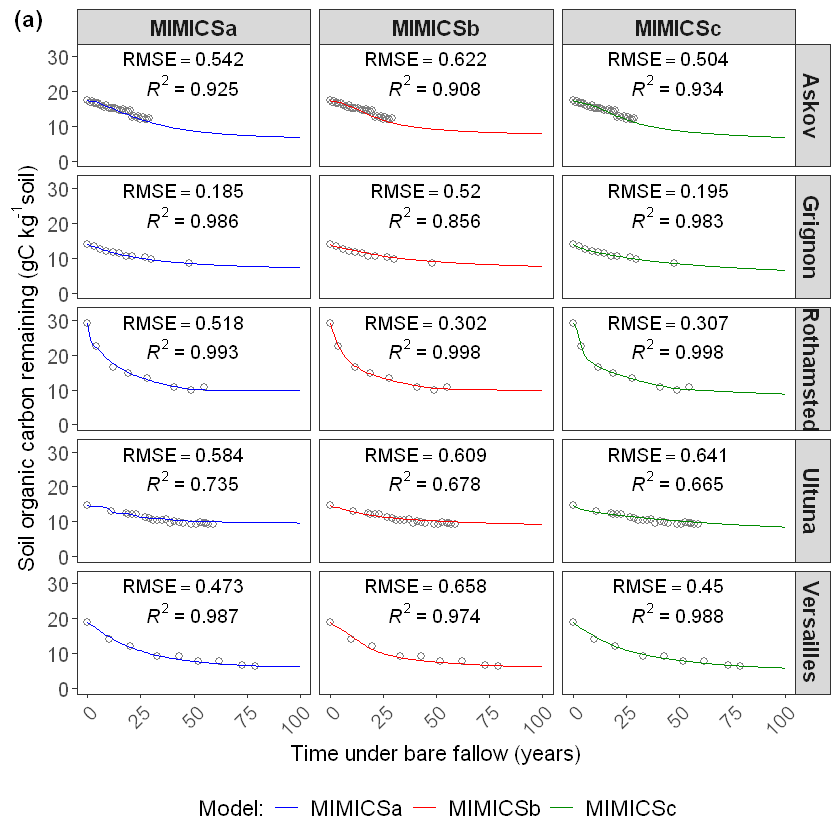

In [15]:
panel_a = ggarrange(bf_scatters, labels = c("(a)"))
panel_a
ggsave("Fig.3-a.eps", width = 5, height = 8)

In [16]:

ggsave("Fig.3-a.jpg", width = 5, height = 8,  dpi=300)

In [20]:
save(bf_scatters, file = 'bf_scatters_data_abc.RData')

## Panel b: timeseries of fractions of C pools

In [17]:
# load data
b_mi0 = subset(bf_mimics0, select=c('site', 'years', 'MIC_1', 'MIC_2', 'SOM_1', 'SOM_2', 'SOM_3', 'bulkD' ))
b_mi0$model_type = 'MIMICSa'

b_mi1 = subset(bf_mimics1, select=c('site', 'years', 'MIC_1', 'MIC_2', 'SOM_1', 'SOM_2', 'SOM_3', 'bulkD' ))
b_mi1$model_type = 'MIMICSb'

b_mi2 = subset(bf_mimics2, select=c('site', 'years', 'MIC_1', 'MIC_2', 'SOM_1', 'SOM_2', 'SOM_3', 'bulkD' ))
b_mi2$model_type = 'MIMICSc'

bfdata = rbind(b_mi0, b_mi1, b_mi2)

In [18]:
# Convert the unit of carbon by dividing bulk Density
bfdata$MBr = bfdata$MIC_1/bfdata$bulkD
bfdata$MBK = bfdata$MIC_2/bfdata$bulkD
bfdata$Cphs = bfdata$SOM_1/bfdata$bulkD
bfdata$Cchm = bfdata$SOM_2/bfdata$bulkD
bfdata$Cavl = bfdata$SOM_3/bfdata$bulkD

In [19]:
# combine data
bfdata = subset(bfdata, select = c('site', 'years', 
                                   'MBr', 'MBK', 
                                   'Cavl', 'Cchm', 'Cphs',  'model_type'))
pre.pool <- melt(bfdata,id=c('site', 'years','model_type'))
colnames(pre.pool)= c('site',  'years', 'model_type', 'Pool', 'pool_size')
unique(pre.pool$Pool)
# data prepare done

[1] MBr  MBK  Cavl Cchm Cphs
Levels: MBr MBK Cavl Cchm Cphs

### Area plot of each carbon pool

In [20]:
col_pools = c( 'blue','#008001', # MBr MBK
               '#fe0000', '#e5ab01',   '#808080' )    #  Cavail,  Cchem,  Cphys 

In [21]:
legend_labs = c(
                expression(~italic(MB)[r]), 
                expression(~italic(MB)[K]),    
                expression(~italic(C)[Avl]),
                expression(~italic(C)[Chm]),    
                expression(~italic(C)[Phs]))

In [22]:
pre.pool$Pool = factor(pre.pool$Pool, level = c(
                                            'MBr', 'MBK', 'Cavl',  'Cchm', 'Cphs'))

In [26]:
pre.pool = pre.pool[pre.pool$years<=100, ]
# area plot of carbon component
p_cpools  <- ggplot(pre.pool, aes(x=years, y= pool_size))+
             geom_area(aes(fill= Pool)) +
             facet_grid(site ~ model_type) + 
             ylab(expression(paste('Concentration of carbon pools (gC kg'^'-1',' soil)'))) +
             xlab('Time under bare fallow (years)') +
             guides(fill=guide_legend(title="Pool name:"))+
             scale_fill_manual(values=col_pools,
                               labels= legend_labs) 

In [27]:
# theme 
plt_cpools <- p_cpools + 
              theme_bw()  +  
              theme(panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank()) +
              theme(strip.text.x = element_text(size = 13, face = "bold"),     
                    strip.text.y = element_text(size = 13, face = "bold")) +
              theme(axis.text.x =element_text(size=12, angle = 30, hjust=1), 
                    axis.text.y =element_text(size=12),  
                    axis.title=element_text(size=13)) +
              theme(legend.text =element_text(size=13), 
                    legend.title=element_text(size=13))

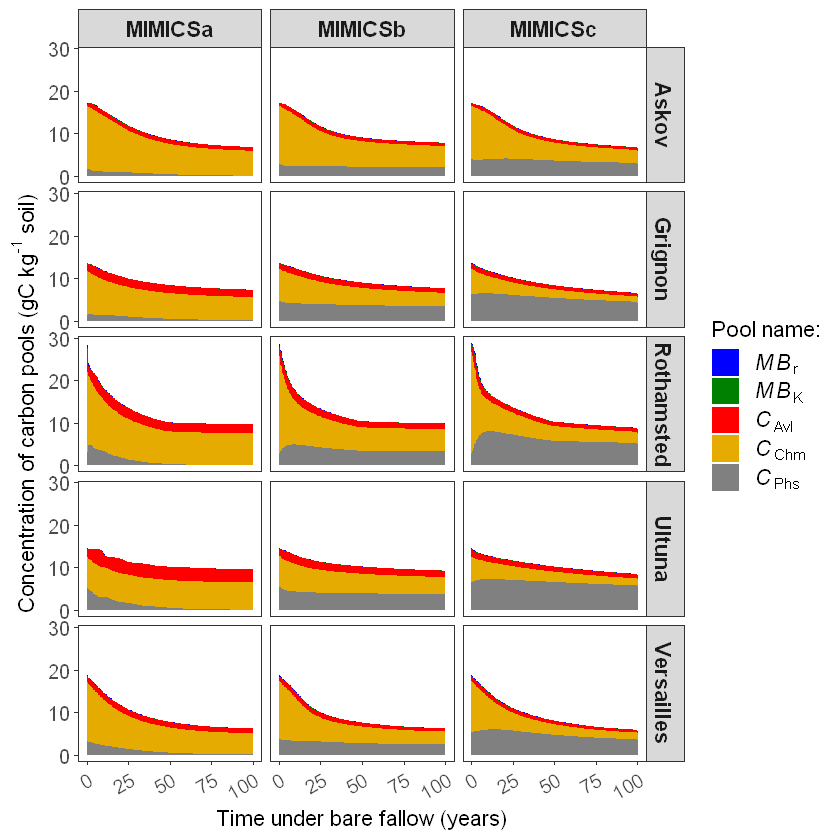

In [28]:
plt_cpools

## Panel c: Plot carbon fractions at initial vs. final stages

In [29]:
pdata = read.csv(file = '../output/Initial_final_fraction_C_pools_Mabc.csv')
unique(pdata$site)

[1] "Askov"      "Grignon"    "Rothamsted" "Ultuna"     "Versailles"

In [30]:
## plot 
pdata$Pool = factor(pdata$Pool, level = c('MBr', 'MBK', 'Cavl',  'Cchm', 'Cphs'))
pdata$stage <- factor(pdata$stage, levels = c('Initial', 'Final'))
p_cfraction <- ggplot(pdata, aes(fill=Pool, y=value, x=stage)) + 
                facet_grid( site ~ model_type ) +
                geom_bar( stat="identity", position="fill",
                        width = 0.75)+
                ylab('Fraction of carbon pools in total SOC')+
                xlab('Bare fallow stages') +
                theme(legend.position="bottom") +
                scale_fill_manual(values=col_pools,
                                  labels= legend_labs)

In [31]:
# theme 
plt_cfraction <- p_cfraction + 
              theme_bw()  +  
              theme(panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank()) +
              theme(strip.text.x = element_text(size = 13, face='bold'),    
                    strip.text.y = element_text(size = 13, face='bold')) +
              theme(axis.text.x =element_text(size=13, angle = 45, hjust=1), 
                    axis.text.y =element_text(size=13),  
                    axis.title=element_text(size=13)) +
              theme(legend.text =element_text(size=13), 
                    legend.title=element_text(size=13)) +
              guides(colour = guide_legend(nrow = 1))     # legend one row

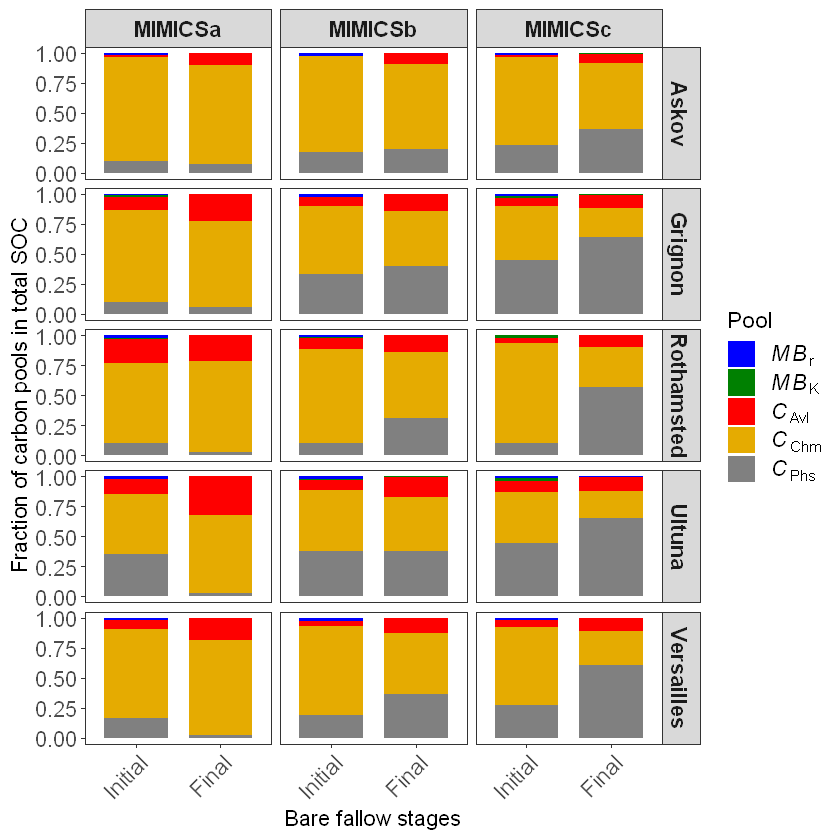

In [32]:
plt_cfraction

In [37]:
panel_b_c = ggarrange(plt_cpools, plt_cfraction,
                    labels = c("(b)", "(c)"),
                    common.legend = TRUE,
                    legend = 'bottom',
                    ncol = 2, nrow = 1,
                    widths = c(1.5, 1.1))
ggsave("Fig.3-b-c.eps", width = 9, height = 8,  dpi=600)
ggsave("Fig.3-b-c.jpg", width = 9, height = 8,  dpi=600)

#### Merge the three panels together

In [39]:
p_bfs = ggarrange(panel_a, panel_b_c,
                 widths = c(4.8, 8.2))
ggsave("Fig.3.eps", width = 14, height = 8)